# Project: Wrangling and Analyze Data

In [1093]:
import pandas as pd
import numpy as np
import json
import requests

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1094]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [1095]:
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'


In [1096]:
response = requests.get(url)

In [1097]:
print(response)

<Response [200]>


In [1098]:
with open('image-predictions.tsv', 'wb')as file:
    file.write(response.content)
df_2 = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [1099]:
"""
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
"""

tweet_list=[]

with open('tweet-json.txt', 'r')as file:
    for line in file:
        data = json.loads(line)
        tweet_list.append(data)

In [1100]:
tweet_list[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [1101]:
df_3 = pd.DataFrame(tweet_list, columns=['id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



##### Make a copy of the data frames

In [1102]:
df1=df_1.copy()
df2=df_2.copy()
df3=df_3.copy()

In [1103]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [1104]:
df1.head(60)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [1105]:
df1.tail(60)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2296,667090893657276420,NaN,NaN,2015-11-18 21:23:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clybe. He is an Anemone Valdez. One ea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667090893...,7,10,Clybe,None,None,None,None
2297,667073648344346624,NaN,NaN,2015-11-18 20:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is Dave. He is actually just a skinny leg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667073648...,10,10,Dave,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
2299,667065535570550784,NaN,NaN,2015-11-18 19:43:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Hufflepuff. Loves vest. Eyes wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667065535...,8,10,None,None,None,None,None
2300,667062181243039745,NaN,NaN,2015-11-18 19:29:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keet. He is a Floridian Amukamara. Abs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667062181...,10,10,Keet,None,None,None,None
2301,667044094246576128,NaN,NaN,2015-11-18 18:17:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 gimme now https://t.co/QZAnwgnOMB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667044094...,12,10,None,None,None,None,None
2302,667012601033924608,NaN,NaN,2015-11-18 16:12:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Klevin. He laughs a lot. Very cool dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667012601...,9,10,Klevin,None,None,None,None
2303,666996132027977728,NaN,NaN,2015-11-18 15:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carll. He wants to be a donkey. But al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666996132...,10,10,Carll,None,None,None,None
2304,666983947667116034,NaN,NaN,2015-11-18 14:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a curly Ticonderoga named Pepe. No fee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666983947...,11,10,a,None,None,None,None
2305,666837028449972224,NaN,NaN,2015-11-18 04:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My goodness. Very rare dog here. Large. Tail d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666837028...,3,10,None,None,None,None,None


In [1106]:
df1['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [1107]:
df1[df1['name'] == 'such']
#print(such)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None


In [1108]:
df1[df1['name'].duplicated()].index

Int64Index([   7,   12,   23,   24,   25,   30,   32,   35,   37,   41,
            ...
            2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355],
           dtype='int64', length=1399)

In [1109]:
df2.head(60)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [1110]:
df2[['p1','p2','p3']].value_counts()

p1                p2                  p3                
malamute          Siberian_husky      Eskimo_dog            17
golden_retriever  Labrador_retriever  kuvasz                16
Pembroke          Cardigan            Chihuahua             15
                                      basenji               11
golden_retriever  kuvasz              Labrador_retriever     9
                                                            ..
Saint_Bernard     Pekinese            Great_Pyrenees         1
                  Leonberg            golden_retriever       1
                  English_springer    boxer                  1
Rottweiler        miniature_pinscher  kelpie                 1
zebra             tiger               prairie_chicken        1
Length: 1742, dtype: int64

In [1111]:
 df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1112]:
df3.head(60)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [1113]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
1. drop columns p1_dog, p2_dog, p3_dog; p1,p2,p3 and p1_conf,p2_conf,p3_conf
2. drop columns floofer, doggo, puppo and pupper
3. source should have only the means used in tweeting
4. timestamp should be in date-time datatype
5. in_reply_to_status_id and in_reply_to_user_id be dropped
6. retweeted_status_id, retweeted_status_timestamp and retweeted_status_user_id be dropped
7. drop expanded_urls 
8. the names a, None, such, quite, an and the should be removed from names columns as they are not proper names for dogs(validity issue)
9. the name timothy is mispelled as jimothy and names should be sentence cased
10. there are duplicated rows in the name column that needs to be removed
11. tweet id and id dtype of the three datasets should be converted to object
12. names that aren't dog breeds; breed names should be sentence cased


### Tidiness issues
1. P1_dog, P2_dog, P3_dog, P1_conf, P2_conf, p3_conf, P1, P2, P3 should be made into two columns of dog confidence and breed

2. Floofer, Puppo, Pupper and Doggo should be collapsed to a column

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

### Tidiness Issue #1: Cleaning the image data to only dogs images and also combine some of the columns

##### df2 has structural problem. p1,p2,p3 can be brought into a column say,dog_breed, while p1_conf, p2_conf, p3_conf can also be brought into a column confidence and p1_dog, p2_dog, p3_dog are not needed since we are working with dog images only. However, we need to make sure the images are only dog images
 

#### Code:

In [1114]:
df2[['p1_dog','p2_dog','p3_dog']].value_counts()

p1_dog  p2_dog  p3_dog
True    True    True      1243
False   False   False      324
True    True    False      155
False   True    True       101
True    False   True        91
False   False   True        64
        True    False       54
True    False   False       43
dtype: int64

In [1115]:
is_dog =[(df2['p1_dog']==True), (df2['p2_dog']==True), (df2['p3_dog']==True)]

In [1116]:
dog_breed = [(df2['p1']), (df2['p2']), (df2['p3'])]

In [1117]:
confidence = [(df2['p1_conf']), (df2['p2_conf']), (df2['p3_conf'])]

In [1118]:
df2['dog_breed'] = np.select(is_dog, dog_breed, default='none')

In [1119]:
df2['confidence'] = np.select(is_dog, confidence, default=0)

#### Test:

In [1120]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   p1          2075 non-null   object 
 4   p1_conf     2075 non-null   float64
 5   p1_dog      2075 non-null   bool   
 6   p2          2075 non-null   object 
 7   p2_conf     2075 non-null   float64
 8   p2_dog      2075 non-null   bool   
 9   p3          2075 non-null   object 
 10  p3_conf     2075 non-null   float64
 11  p3_dog      2075 non-null   bool   
 12  dog_breed   2075 non-null   object 
 13  confidence  2075 non-null   float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 184.5+ KB


### Quality Issue #1: Drop the redundant Columns in the image data frame; df2 

### Define: Next is to drop p1,p2,p3,p1_dog,p2_dog,p3_dog,p1_conf,p2_conf,p3_conf

### Code:

In [1121]:
df2.drop(df2.columns[[3,4,5,6,7,8,9,10,11]], axis=1, inplace=True)

### Test:

In [1122]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   dog_breed   2075 non-null   object 
 4   confidence  2075 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.2+ KB


### Tidiness Issue #2

### Define


###### Since doggo, floofer, pupper and puppo are stages in dogs' lifecycle, we'll convert them to a column named dog_stage
But since there are null values in the columns as 'none', we'll have to convert them to numpy's na, remove the spaces that'll remain after removing the na and then drop them.

### Code:

In [1123]:
dog_stage = ['doggo', 'floofer', 'pupper', 'puppo']

In [1124]:
df1[['doggo','floofer','pupper','puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  None     None    puppo       1
       floofer  None    None        1
dtype: int64

In [1125]:
df1[dog_stage] = df1[dog_stage].replace('None', np.NaN)

In [1126]:
df1[dog_stage].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   doggo    97 non-null     object
 1   floofer  10 non-null     object
 2   pupper   257 non-null    object
 3   puppo    30 non-null     object
dtypes: object(4)
memory usage: 73.8+ KB


##### Now we remove the null rows and the spaces

In [1127]:
def combine(x):
    return ', '.join(x.dropna().astype(str))
df1['dog_stage']= df1[dog_stage].apply(combine, axis=1) 
df1['dog_stage']= df1['dog_stage'].replace('', np.nan)

### Test:

In [1128]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       97 no

In [1129]:
df1['dog_stage'].value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

### Quality Issue #2

### Define 

#### Now we drop the columns 'doggo', 'floofer', 'pupper', and 'puppo'

### Code

In [1130]:
df1.drop(df1.columns[[13, 14, 15, 16]], axis=1, inplace=True)

### Test

In [1131]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   380 n

### Quality Issue #3

### Define

#### Now we extract the source(text) of each tweet from the url in the source column

### Code

In [1132]:
df1['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [1133]:
from bs4 import BeautifulSoup
#import urllib2
s_list=[]

for s in df1['source']:
    #content = urllib2.urlopen(source).read
    soup= BeautifulSoup(s)
    s_list.append(soup.get_text())

In [1134]:
df1['source']= s_list

### Test

In [1135]:
df1['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Quality Issue #4

### Define

##### Now we convert data type of timestamp to datetime

### Code

In [1136]:
df1['timestamp'].dtype

dtype('O')

In [1137]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

### Test

In [1138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Quality Issue #5

### Define

##### We now drop reply rows/columns in in_reply_to_status_id, in_reply_to_user_id

### Code

In [1139]:
#create a drop column/row function
def drop_row_col(df, row_col, axis=1):
    df.drop(row_col, axis=axis, inplace=True)

In [1140]:
replies= df1[pd.notnull(df1['in_reply_to_status_id'])].index
drop_row_col(df1, replies, axis=0)

col=['in_reply_to_status_id', 'in_reply_to_user_id']
drop_row_col(df1, col, axis=1)

### Test

In [1141]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2278 non-null   int64              
 1   timestamp                   2278 non-null   datetime64[ns, UTC]
 2   source                      2278 non-null   object             
 3   text                        2278 non-null   object             
 4   retweeted_status_id         181 non-null    float64            
 5   retweeted_status_user_id    181 non-null    float64            
 6   retweeted_status_timestamp  181 non-null    object             
 7   expanded_urls               2274 non-null   object             
 8   rating_numerator            2278 non-null   int64              
 9   rating_denominator          2278 non-null   int64              
 10  name                        2278 non-null   object          

### Quality Issue #6

### Define

##### Drop rows/columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

### Code

In [1142]:
retweeted= df1[pd.notnull(df1['retweeted_status_id'])].index
drop_row_col(df1, retweeted, axis=0)

cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
drop_row_col(df1, cols, axis=1)

### Test

In [1143]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   dog_stage           336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 163.8+ KB


### Quality Issue #7

### Define

##### Now we drop column expanded_urls

### Code

In [1144]:
col=['expanded_urls']
drop_row_col(df1, col, axis=1)

### Test

In [1145]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   dog_stage           336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 147.4+ KB


### Quality Issue #8

### Define

##### Now we convert tweet_id of df1, df2 and id of df3 to object from int. since we are not making decisions based on the columns

### Code

In [1146]:
df1['tweet_id']= df1['tweet_id'].astype(str)
df2['tweet_id']= df2['tweet_id'].astype(str)
df3['id']= df3['id'].astype(str)

### Test

In [1147]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   dog_stage           336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 147.4+ KB


In [1148]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   object 
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   dog_breed   2075 non-null   object 
 4   confidence  2075 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.2+ KB


In [1149]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Quality Issue #9

### Define

##### Remove none from dog_breed column

### Code

In [1150]:
df2['dog_breed'].value_counts()

none                    324
golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
                       ... 
Scotch_terrier            1
EntleBucher               1
Japanese_spaniel          1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: dog_breed, Length: 114, dtype: int64

In [1151]:
nn= df2[df2['dog_breed']=='none'].index
nn

Int64Index([   6,   17,   18,   21,   25,   29,   45,   50,   51,   53,
            ...
            1953, 1956, 1975, 1979, 2012, 2021, 2022, 2046, 2052, 2074],
           dtype='int64', length=324)

In [1152]:
drop_row_col(df2, nn, axis=0)

### Test

In [1153]:
df2['dog_breed'].value_counts()

golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
pug                      65
                       ... 
Scotch_terrier            1
EntleBucher               1
Japanese_spaniel          1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: dog_breed, Length: 113, dtype: int64

### Quality Issue #10

### Define

#### Remove the underscore '_' in the breed names

### Code

In [1154]:
breed =[]
for w in df2['dog_breed']:
    wrd= w.replace('_', ' ')
    breed.append(wrd)
df2['dog_breed']=breed

### Test

In [1155]:
df2['dog_breed'].value_counts()

golden retriever        173
Labrador retriever      113
Pembroke                 96
Chihuahua                95
pug                      65
                       ... 
Scotch terrier            1
EntleBucher               1
Japanese spaniel          1
standard schnauzer        1
Bouvier des Flandres      1
Name: dog_breed, Length: 113, dtype: int64

### Quality Issue #11

### Define

#### Make dog_breed into sentence case

### Code

In [1156]:
capital= []
for a in df2['dog_breed']:
    name=a.capitalize()
    capital.append(name)
df2['dog_breed']= capital

### Test

In [1157]:
df2['dog_breed'].head(60)

0          Welsh springer spaniel
1                         Redbone
2                 German shepherd
3             Rhodesian ridgeback
4              Miniature pinscher
5            Bernese mountain dog
7                            Chow
8                Golden retriever
9                Miniature poodle
10               Golden retriever
11                  Gordon setter
12                   Walker hound
13                            Pug
14                     Bloodhound
15                          Lhasa
16                 English setter
19              Italian greyhound
20                    Maltese dog
22                   Newfoundland
23               Golden retriever
24                       Malamute
26    Soft-coated wheaten terrier
27                      Chihuahua
28        Black-and-tan coonhound
30                    Toy terrier
31               Blenheim spaniel
32                       Pembroke
33                  Irish terrier
34       Chesapeake bay retriever
35            

### Quality Issue #12

### Define

#### Now we remove the duplicated rows in the dog breed column

### Code

In [1158]:
df2['dog_breed'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2069     True
2070     True
2071     True
2072     True
2073     True
Name: dog_breed, Length: 1751, dtype: bool

In [1159]:
duplicates= df2[df2['dog_breed'].duplicated()].index

drop_row_col(df2, duplicates, axis=0)

### Test

In [1160]:
df2['dog_breed'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1275    False
1435    False
1458    False
1459    False
1942    False
Name: dog_breed, Length: 113, dtype: bool

In [1161]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 1942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    113 non-null    object 
 1   jpg_url     113 non-null    object 
 2   img_num     113 non-null    int64  
 3   dog_breed   113 non-null    object 
 4   confidence  113 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.3+ KB


### Quality Issue #13

### Define

#### Now we extract the correct numerator from ratings in the text column, convert it to float datatype and create a ratings column with it

### Code

In [1162]:
df1['ratings'] = df1['text'].str.extract('(\d+\.*\d*/\d+)', expand=False).str.split('/').str[0]

In [1163]:
df1['ratings']= df1['ratings'].astype(float)

### Test

In [1164]:
df1['ratings']

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
        ... 
2351     5.0
2352     6.0
2353     9.0
2354     7.0
2355     8.0
Name: ratings, Length: 2097, dtype: float64

In [1165]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   dog_stage           336 non-null    object             
 8   ratings             2097 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 163.8+ KB


### Quality Issue #14

### Define

##### Drop columns rating_numerator and rating_denominator

### Code

In [1166]:
cols =['rating_numerator', 'rating_denominator']
drop_row_col(df1, cols, axis=1)

### Test

In [1167]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2097 non-null   object             
 1   timestamp  2097 non-null   datetime64[ns, UTC]
 2   source     2097 non-null   object             
 3   text       2097 non-null   object             
 4   name       2097 non-null   object             
 5   dog_stage  336 non-null    object             
 6   ratings    2097 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 131.1+ KB


### Quality Issue #15

### Define

#### Names column has words that are no names, they should be removed

#### Code

In [1168]:
#check for unique words to note those that aren't names 
Names=df1['name'].unique()

Names

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [1169]:
#all phrases that aren't names are observed to be in lower case, so we extract them from the list of unique names
Lower= []
for x in Names:
    if x==x.lower():
        Lower.append(x)
print(Lower)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [1170]:
#this code finds the index value of each of the non-names
i= []
for row in Lower:
    ind= df1[df1['name']==row].index
    i.append(ind)

In [1171]:
#here the index numbers/values are exracted and put in a list
namelist=[]
for j in i:
    for k in j:
        print(k)
        namelist.append(k)

22
56
649
801
1002
1004
1017
1049
1193
1207
1340
1351
1361
1368
1382
1499
1737
1785
1853
1854
1877
1878
1923
1941
1955
1994
2034
2066
2116
2125
2128
2146
2153
2161
2191
2198
2211
2218
2222
2235
2249
2255
2264
2273
2287
2304
2311
2314
2327
2334
2347
2348
2350
2352
2353
2354
169
193
2326
335
988
369
924
993
1936
542
819
1031
1097
1385
852
992
1025
1362
2204
2333
2335
2349
1040
1693
1063
1457
2019
1071
1435
1095
1120
1121
1138
1206
1259
1527
1603
1797
1815
2037
2212
2345
2346
1724
1747
1916
2001
2030


In [1172]:
#we now delete each of those non-names and their instances
drop_row_col(df1, namelist, axis=0)
None_= df1[df1['name']=='None'].index

In [1173]:
drop_row_col(df1, None_, axis=0)

### Test

In [1174]:
df1['name'].value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
              ..
Shelby         1
Sephie         1
Bonaparte      1
Wishes         1
Christoper     1
Name: name, Length: 929, dtype: int64

In [1175]:
df1['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'Jax', 'Zoey',
       'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',
     

In [1176]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 2325
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   1390 non-null   object             
 1   timestamp  1390 non-null   datetime64[ns, UTC]
 2   source     1390 non-null   object             
 3   text       1390 non-null   object             
 4   name       1390 non-null   object             
 5   dog_stage  184 non-null    object             
 6   ratings    1390 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 86.9+ KB


### Quality Issue #16

### Define

#### Drop the column text

### Code

In [1177]:
col=['text']
drop_row_col(df1, col, axis=1)

### Test

In [1178]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 2325
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   1390 non-null   object             
 1   timestamp  1390 non-null   datetime64[ns, UTC]
 2   source     1390 non-null   object             
 3   name       1390 non-null   object             
 4   dog_stage  184 non-null    object             
 5   ratings    1390 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 76.0+ KB


### Renaming the id column in the tweets dataframe, df3

### Code

In [1179]:
df3= df3.rename(columns={'id':'tweet_id'})

### Test

In [1180]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


## Merging the cleaned df1 and df3

### Code

In [1182]:
merge_df = pd.merge(df1, df3, on='tweet_id', how='left')

### Test

In [1183]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 1389
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1390 non-null   object             
 1   timestamp       1390 non-null   datetime64[ns, UTC]
 2   source          1390 non-null   object             
 3   name            1390 non-null   object             
 4   dog_stage       184 non-null    object             
 5   ratings         1390 non-null   float64            
 6   retweet_count   1390 non-null   int64              
 7   favorite_count  1390 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(4)
memory usage: 97.7+ KB


## Merging merge_df with df2 to create a master dataframe

### Code

In [1186]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 1942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    113 non-null    object 
 1   jpg_url     113 non-null    object 
 2   img_num     113 non-null    int64  
 3   dog_breed   113 non-null    object 
 4   confidence  113 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.3+ KB


In [1187]:
master_df= pd.merge(merge_df, df2, on='tweet_id', how='inner')

### Test

In [1188]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        58 non-null     object             
 1   timestamp       58 non-null     datetime64[ns, UTC]
 2   source          58 non-null     object             
 3   name            58 non-null     object             
 4   dog_stage       6 non-null      object             
 5   ratings         58 non-null     float64            
 6   retweet_count   58 non-null     int64              
 7   favorite_count  58 non-null     int64              
 8   jpg_url         58 non-null     object             
 9   img_num         58 non-null     int64              
 10  dog_breed       58 non-null     object             
 11  confidence      58 non-null     float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(6)
memory usage: 5.9+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [1190]:
master_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [1191]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        58 non-null     object             
 1   timestamp       58 non-null     datetime64[ns, UTC]
 2   source          58 non-null     object             
 3   name            58 non-null     object             
 4   dog_stage       6 non-null      object             
 5   ratings         58 non-null     float64            
 6   retweet_count   58 non-null     int64              
 7   favorite_count  58 non-null     int64              
 8   jpg_url         58 non-null     object             
 9   img_num         58 non-null     int64              
 10  dog_breed       58 non-null     object             
 11  confidence      58 non-null     float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(6)
memory usage: 5.9+ KB


##### Tweet Source

In [1192]:
master_df['source'].value_counts()

Twitter for iPhone    54
Twitter Web Client     3
TweetDeck              1
Name: source, dtype: int64

##### Ratings

In [1193]:
master_df['confidence'].median()

0.4163655

In [1194]:
high_rating= master_df.query('confidence>=0.461')

low_rating= master_df.query('confidence<0.461')

In [1195]:
high_rating

,tweet_id,timestamp,source,name,dog_stage,ratings,retweet_count,favorite_count,jpg_url,img_num,dog_breed,confidence
0,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,Sophie,pupper,11.27,1885,7320,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,Clumber,0.946718
3,750056684286914561,2016-07-04 20:00:23+00:00,TweetDeck,Jameson,NaN,11.00,1011,3444,https://pbs.twimg.com/media/Cmfx2oNW8AAGg4H.jpg,1,Saluki,0.484428
9,683142553609318400,2016-01-02 04:27:31+00:00,Twitter for iPhone,Brandy,pupper,9.00,1173,3162,https://pbs.twimg.com/media/CXsChyjW8AQJ16C.jpg,1,Leonberg,0.605851
11,677301033169788928,2015-12-17 01:35:24+00:00,Twitter for iPhone,Juckson,NaN,5.00,471,1362,https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg,1,Japanese spaniel,0.661178
15,674262580978937856,2015-12-08 16:21:41+00:00,Twitter for iPhone,Gus,pupper,9.00,498,1391,https://pbs.twimg.com/media/CVt2PawWIAEUkqW.jpg,1,Greater swiss mountain dog,0.519428
16,674019345211760640,2015-12-08 00:15:09+00:00,Twitter for iPhone,Acro,NaN,10.00,340,1208,https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg,1,Collie,0.992732
17,673656262056419329,2015-12-07 00:12:23+00:00,Twitter for iPhone,Albert,pupper,10.00,265,769,https://pbs.twimg.com/media/CVlOy3pW4AQ9H1K.jpg,1,Bull mastiff,0.700625
18,673213039743795200,2015-12-05 18:51:11+00:00,Twitter for iPhone,Dexter,NaN,10.00,929,2410,https://pbs.twimg.com/media/CVe7r7QVEAAc4Bg.jpg,1,Schipperke,0.888082
19,672594978741354496,2015-12-04 01:55:13+00:00,Twitter for iPhone,Scott,pupper,9.00,661,1411,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1,Great pyrenees,0.755945
21,671528761649688577,2015-12-01 03:18:27+00:00,Twitter for iPhone,Jax,NaN,10.00,280,896,https://pbs.twimg.com/media/CVG_2I-WIAASKSS.jpg,1,Doberman,0.782626


In [1196]:
low_rating

,tweet_id,timestamp,source,name,dog_stage,ratings,retweet_count,favorite_count,jpg_url,img_num,dog_breed,confidence
1,777885040357281792,2016-09-19 15:00:20+00:00,Twitter for iPhone,Wesley,NaN,3.0,1893,7078,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,Afghan hound,0.123529
2,773704687002451968,2016-09-08 02:09:06+00:00,Twitter for iPhone,Loki,NaN,12.0,1891,7317,https://pbs.twimg.com/media/CrzATQqWAAEHq2t.jpg,2,Silky terrier,0.324251
4,749317047558017024,2016-07-02 19:01:20+00:00,Twitter for iPhone,Blu,floofer,12.0,2509,6076,https://pbs.twimg.com/ext_tw_video_thumb/74931...,1,Wire-haired fox terrier,0.155144
5,699788877217865730,2016-02-17 02:54:04+00:00,Twitter for iPhone,Nala,NaN,12.0,557,2458,https://pbs.twimg.com/media/CbYmRHyWEAASNzm.jpg,1,Border terrier,0.355060
6,694352839993344000,2016-02-02 02:53:12+00:00,Twitter for iPhone,Oliviér,NaN,10.0,700,2244,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,2,Australian terrier,0.407886
7,689283819090870273,2016-01-19 03:10:43+00:00,Twitter for iPhone,Chipson,NaN,9.0,1250,3624,https://pbs.twimg.com/media/CZDT-mZWsAEK9BH.jpg,1,Scotch terrier,0.267979
8,683849932751646720,2016-01-04 03:18:23+00:00,Twitter for iPhone,Jiminy,NaN,5.0,1116,2896,https://pbs.twimg.com/media/CX2F4qNUQAAR6Cm.jpg,1,Mexican hairless,0.164906
10,680161097740095489,2015-12-24 23:00:17+00:00,Twitter for iPhone,Goliath,NaN,12.0,828,2538,https://pbs.twimg.com/media/CXBq6RPWkAAaNuU.jpg,1,Bluetick,0.268681
12,676582956622721024,2015-12-15 02:02:01+00:00,Twitter for iPhone,Vinnie,NaN,8.0,312,1310,https://pbs.twimg.com/media/CWO0m8tUwAAB901.jpg,1,Boston bull,0.196307
13,676146341966438401,2015-12-13 21:07:04+00:00,Twitter for iPhone,Bert,NaN,10.0,744,2077,https://pbs.twimg.com/media/CWIngp5WEAAJOy3.jpg,1,Irish water spaniel,0.388332


#### The Breed with the highest confidence level

In [1197]:
max_conf= master_df['confidence'].max()
master_df[master_df['confidence']== max_conf]['dog_breed']

24    Keeshond
Name: dog_breed, dtype: object

In [1198]:
max_conf

0.994065

### Insights:
1. The most tweets were from iphones

2. Confidence level of dogs has no effect on their ratings

3. The dog breed with the highest confidence level is the Keeshond

### Visualization

In [1199]:
import seaborn as sns
sns.set()

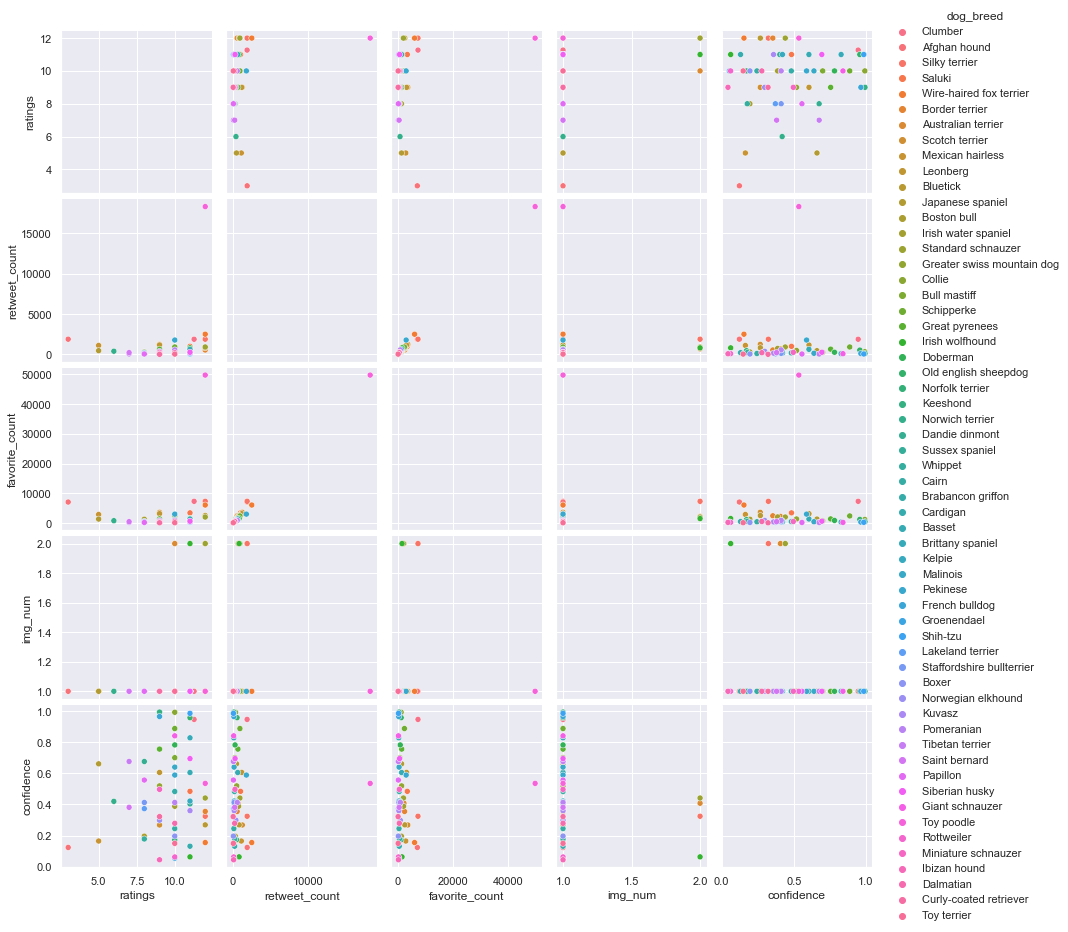

In [1200]:
sns.pairplot(master_df, hue='dog_breed', height=2.5)